In [31]:
from pathlib import Path
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

%matplotlib inline

In [32]:
# default image set folder
dls = Path.cwd() / "final" 
imgs = [imgpath for imgpath in dls.glob('**/*')]

# list all folders - image categories
[str(f).split("/")[-1] for f in dls.glob('*')]

['cat',
 'portrait baby',
 '.DS_Store',
 'close up photo face',
 'face',
 'doctor',
 'face_new_f',
 'portrait child',
 'portrait photo',
 'FINISHED',
 'politician',
 'tennis player',
 'train',
 'faces_new',
 'face_new_m',
 'face_new_c',
 'face_new_b',
 'teacher',
 'surfer',
 'tomato',
 'artist']

In [33]:
#### SELECT CATEGORY HERE ###########
CATEGORY = "cat"


cat_path = dls / CATEGORY / "resized"
imgs_cat = [imgpath for imgpath in cat_path.glob('**/*') 
                        if ".DS_Store" not in str(imgpath)]
len(imgs_cat)

83

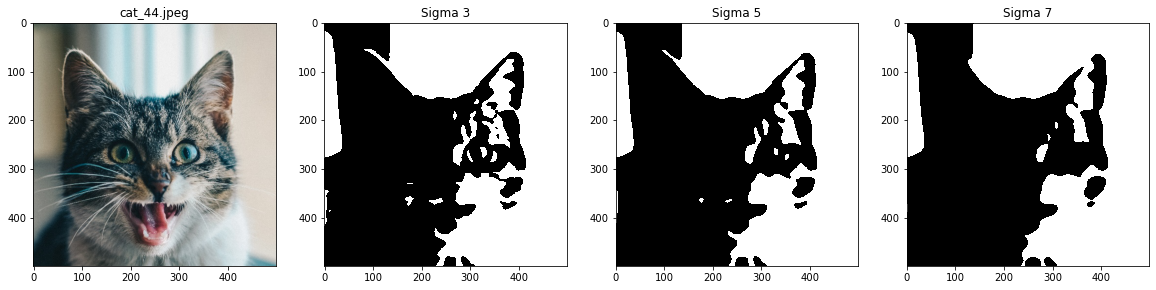

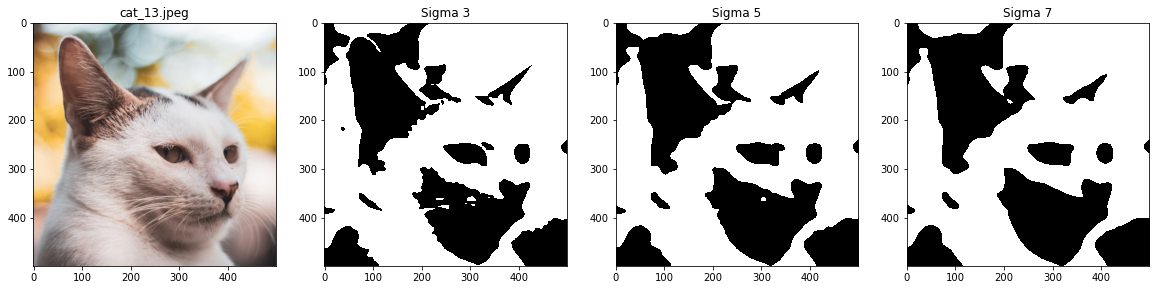

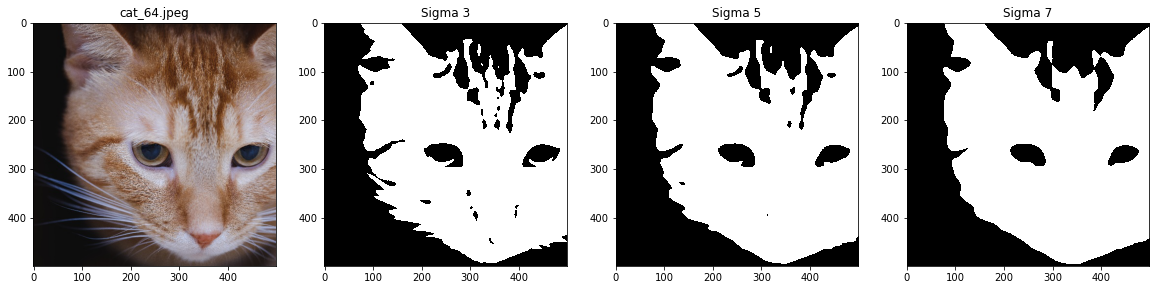

In [34]:
sigma_vals = (0, 3, 5, 7)

for im in imgs_cat[3:6]:
    try:
        image = skimage.io.imread(im)[:,:,:3]
        gray_image = skimage.color.rgb2gray(image)

        f, a = plt.subplots(1, len(sigma_vals), figsize=(20,20))
        for i in range(len(a.ravel())):
            if (i % len(sigma_vals) == 0):
                a[i].imshow(image)
                a[i].set_title(str(im).split("/")[-1][:40]) # limit title to 40 chars to prevent offset
                continue
            blurred = skimage.filters.gaussian(gray_image, sigma=sigma_vals[i])
            t = skimage.filters.threshold_otsu(blurred)
            a[i].imshow(blurred > t, cmap='gray', interpolation='nearest')
            a[i].set_title(f"Sigma {sigma_vals[i]}")
    except:
        pass

In [35]:
SIGMA = 5

output = cat_path / "mooney"
output.mkdir(parents=True, exist_ok=True)

cat_name = str(cat_path).split("/")[-2]

for i, im in enumerate(imgs_cat):
    try:
        image = skimage.io.imread(im)[:,:,:3]
        gray_image = skimage.color.rgb2gray(image)
        blurred = skimage.filters.gaussian(gray_image, sigma=SIGMA)
        t = skimage.filters.threshold_otsu(blurred)

        plt.imsave((output / f"{cat_name}_{i}.jpg"), blurred > t, cmap='gray')#, interpolation='nearest')
        plt.imsave((output / f"dis_{cat_name}_{i}.jpg"), gray_image, cmap='gray')
    except:
        pass